## Border and Obstacles

In [13]:
from optiwindnet.api import WindFarmNetwork
import numpy as np
import matplotlib.pyplot as plt

### Create a sample network

In [14]:
# all coordinates are sequences of (x, y) pairs
# if input coordinates are in arrays X and Y, use `np.hstack((X, Y))`
border = np.array( # coordinate sequence defines the polygon, last-first segment implicit
    [[1951, 200], [1951, 1383], [386, 1383], [650, 708], [624, 678],
     [4, 1036], [4, 3], [1152, 3], [917, 819], [957, 854]],
    dtype=float)

obstacles = [
    # - obstacles must be strictly inside the border polygon
    # - undefined behavior if obstacles and border overlap
    # first obstacle
    np.array([[1540, 920], [1600, 940], [1600, 1150], [1400, 1200]]),
    # [second obstacle] ...
]

substations = np.array([[696, 1063],], dtype=float)
turbines = np.array(
    [[1940, 279], [1920, 703], [1475, 696], [1839, 1250],
     [1277, 1296], [442, 1359], [737, 435], [1060, 26],
     [522, 176], [87, 35], [184, 417], [71, 878]],
    dtype=float
)

In [15]:
# all coordinates are sequences of (x, y) pairs
# if input coordinates are in arrays X and Y, use `np.hstack((X, Y))`
border = np.array( # coordinate sequence defines the polygon, last-first segment implicit
    [[0, 0], [10, 0], [10, 10], [0, 10]],
    dtype=float)

obstacles = [
    # - obstacles must be strictly inside the border polygon
    # - undefined behavior if obstacles and border overlap
    # first obstacle
    #np.array([[5, 10], [5, 1], [7, 1], [7, 10]]),
    np.array([[6, 0], [6, 3], [8, 3], [8, 0]]),
    #np.array([[3, 3], [3, 10], [5, 10], [5, 3]]),
    np.array([[3, 3], [3, 5], [5, 5], [5, 4]]),
    # [second obstacle] ...
]

substations = np.array([[10, 2],], dtype=float)
turbines = np.array(
    [[2.9, 4], [10, 9], [1, 9],],
    dtype=float
)

Initialize wfn with the given borders and obstacles

⚠️ Obstacle at index 0 intersects with the exteriour border and is merged into the exterior border.


<Axes: >

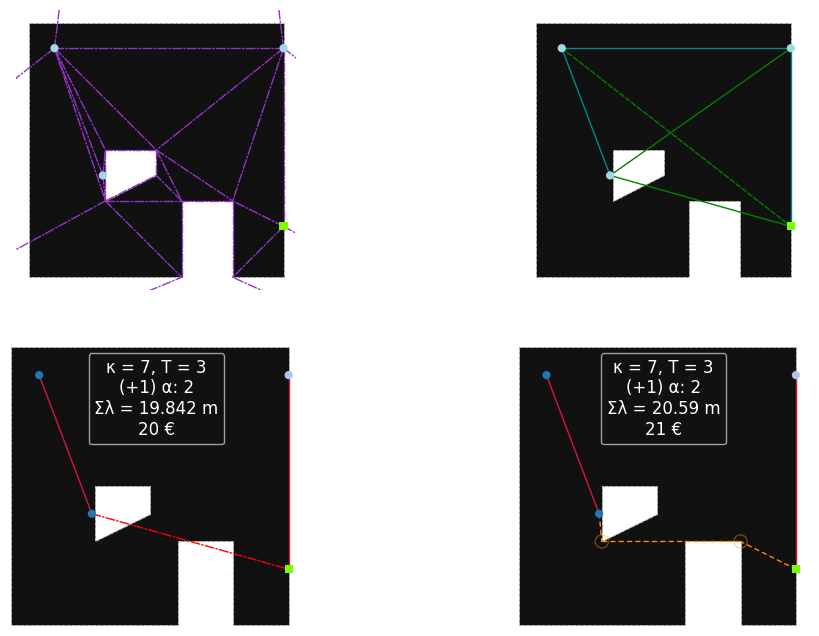

In [16]:
wfn_border_obstacles = WindFarmNetwork(turbinesC=turbines, substationsC=substations, borderC=border, obstaclesC=obstacles, cables=7)
res_optimize = wfn_border_obstacles.optimize()
fig, axs = plt.subplots(2, 2, facecolor='none', figsize=(12, 8))
ax1, ax2, ax3, ax4 = axs.flatten()
wfn_border_obstacles.plot_navigation_mesh(ax=ax1)
wfn_border_obstacles.plot_available_links(ax=ax2)
wfn_border_obstacles.plot_selected_links(ax=ax3)
wfn_border_obstacles.plot(ax=ax4)

In [17]:
wfn_border_obstacles.get_network()

array([( 0,  2, 5.34883165, 1., False, 0, 5.34883165),
       ( 0, 15, 1.00498756, 2.,  True, 0, 1.00498756),
       ( 1, -1, 7.        , 1., False, 0, 7.        ),
       (-1, 16, 2.23606798, 2., False, 0, 2.23606798),
       (15, 16, 5.        , 2.,  True, 0, 5.        )],
      dtype=[('src', '<i8'), ('tgt', '<i8'), ('length', '<f8'), ('load', '<f8'), ('reverse', '?'), ('cable', '<i8'), ('cost', '<f8')])

In [18]:
wfn_border_obstacles.A.graph['hull_concave']

[2, 0, 1, -1, 1]

Only borders


<Axes: >

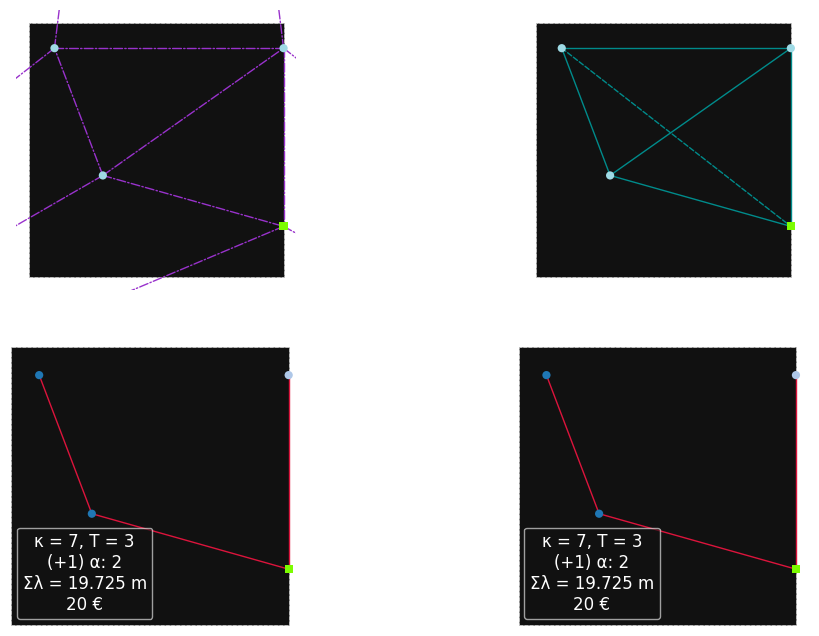

In [20]:
wfn_border = WindFarmNetwork(turbinesC=turbines, substationsC=substations, borderC=border, cables=7)
res_optimize = wfn_border.optimize()
fig, axs = plt.subplots(2, 2, facecolor='none', figsize=(12, 8))
ax1, ax2, ax3, ax4 = axs.flatten()
wfn_border.plot_navigation_mesh(ax=ax1)
wfn_border.plot_available_links(ax=ax2)
wfn_border.plot_selected_links(ax=ax3)
wfn_border.plot(ax=ax4)

Only obstacles

⚠️ Obstacles are given while no border coordinate is defined, optiwindnet is creating borders based on turbine and obstacle coordinates.
⚠️ Obstacle at index 0 intersects with the exteriour border and is merged into the exterior border.
⚠️ Obstacle at index 1 intersects with the exteriour border and is merged into the exterior border.


<Axes: >

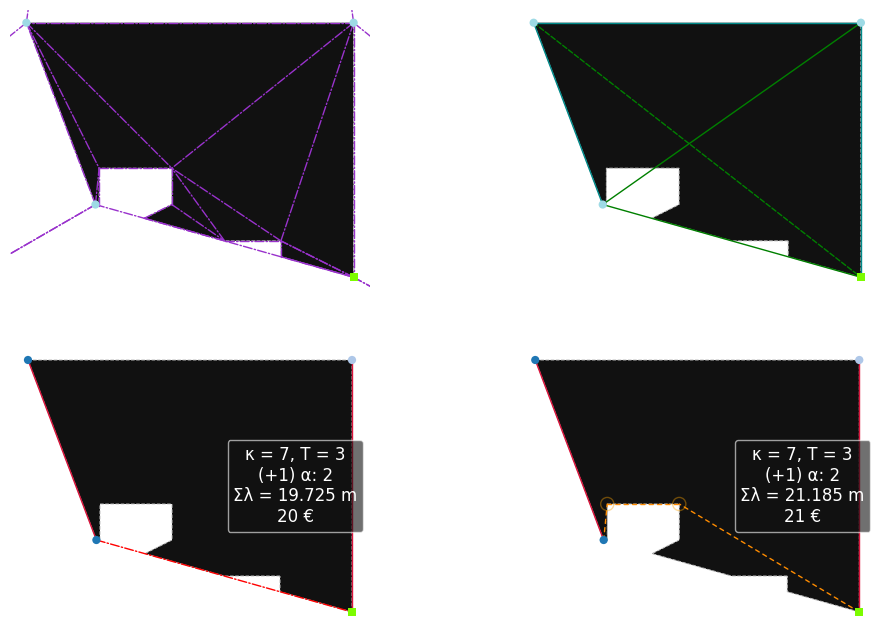

In [21]:
wfn_obstacles = WindFarmNetwork(turbinesC=turbines, substationsC=substations, obstaclesC=obstacles, cables=7)
res_optimize = wfn_obstacles.optimize()
fig, axs = plt.subplots(2, 2, facecolor='none', figsize=(12, 8))
ax1, ax2, ax3, ax4 = axs.flatten()
wfn_obstacles.plot_navigation_mesh(ax=ax1)
wfn_obstacles.plot_available_links(ax=ax2)
wfn_obstacles.plot_selected_links(ax=ax3)
wfn_obstacles.plot(ax=ax4)

No borders, no obstacles

<Axes: >

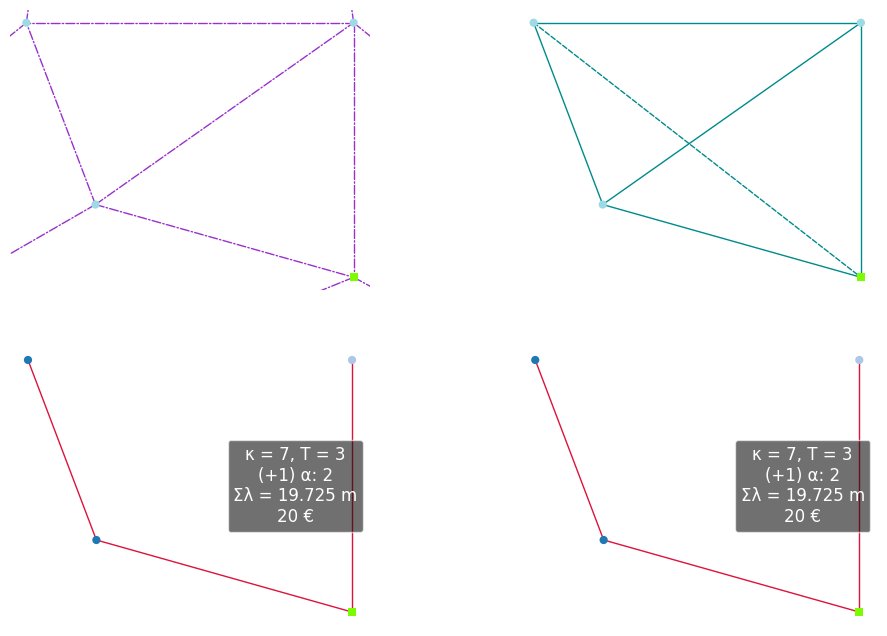

In [23]:
wfn = WindFarmNetwork(turbinesC=turbines, substationsC=substations, cables=7)
res_optimize = wfn.optimize()
fig, axs = plt.subplots(2, 2, facecolor='none', figsize=(12, 8))
ax1, ax2, ax3, ax4 = axs.flatten()
wfn.plot_navigation_mesh(ax=ax1)
wfn.plot_available_links(ax=ax2)
wfn.plot_selected_links(ax=ax3)
wfn.plot(ax=ax4)

New obstacles

In [24]:
obstacles = [
    np.array([[1540, 920], [1600, 940], [1600, 1150], [900, 1900]]),
    np.array([[-100, 100], [400, 100], [400, 400], [100, 400]]),
]

⚠️ Obstacle at index 0 is completely outside the border and is neglegcted.
⚠️ Obstacle at index 1 is completely outside the border and is neglegcted.


<Axes: >

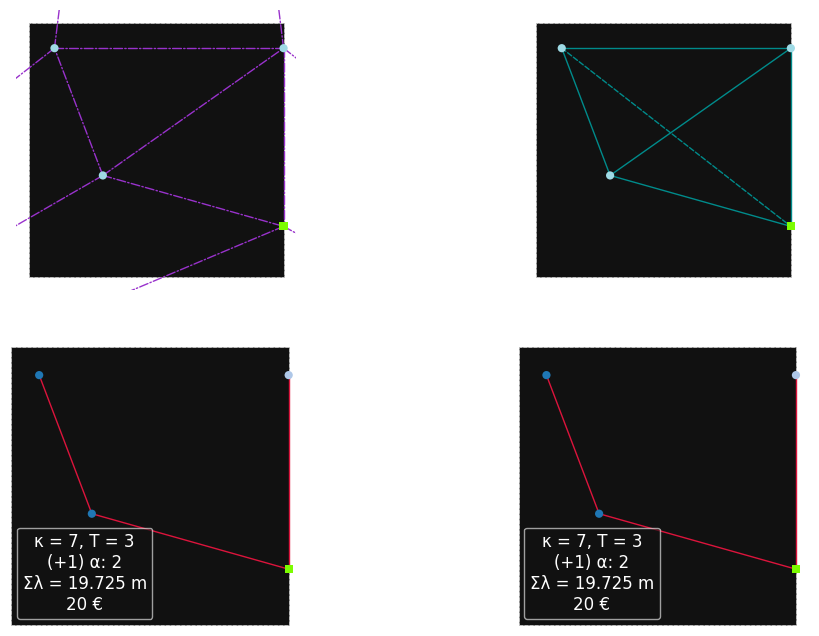

In [25]:
# border + obstacles
wfn_new_border_obstacles = WindFarmNetwork(turbinesC=turbines, substationsC=substations, borderC=border, obstaclesC=obstacles, cables=7)
res_optimize = wfn_new_border_obstacles.optimize()
fig, axs = plt.subplots(2, 2, facecolor='none', figsize=(12, 8))
ax1, ax2, ax3, ax4 = axs.flatten()
wfn_new_border_obstacles.plot_navigation_mesh(ax=ax1)
wfn_new_border_obstacles.plot_available_links(ax=ax2)
wfn_new_border_obstacles.plot_selected_links(ax=ax3)
wfn_new_border_obstacles.plot(ax=ax4)

<Axes: >

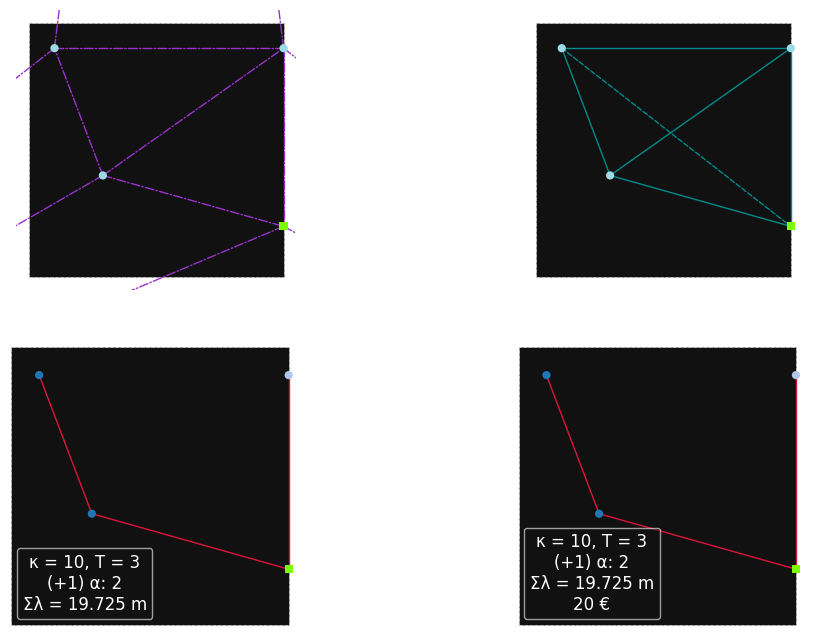

In [ ]:
# only borders
wfn_new_border = WindFarmNetwork(turbinesC=turbines, substationsC=substations, borderC=border)
res_optimize = wfn_new_border.optimize()
fig, axs = plt.subplots(2, 2, facecolor='none', figsize=(12, 8))
ax1, ax2, ax3, ax4 = axs.flatten()
wfn_new_border.plot_navigation_mesh(ax=ax1)
wfn_new_border.plot_available_links(ax=ax2)
wfn_new_border.plot_selected_links(ax=ax3)
wfn_new_border.plot(ax=ax4)

⚠️ Obstacles are given while no border coordinate is defined, optiwindnet is creating borders based on turbine and obstacle coordinates.
⚠️ Obstacle at index 0 is completely outside the border and is neglegcted.
⚠️ Obstacle at index 1 is completely outside the border and is neglegcted.


<Axes: >

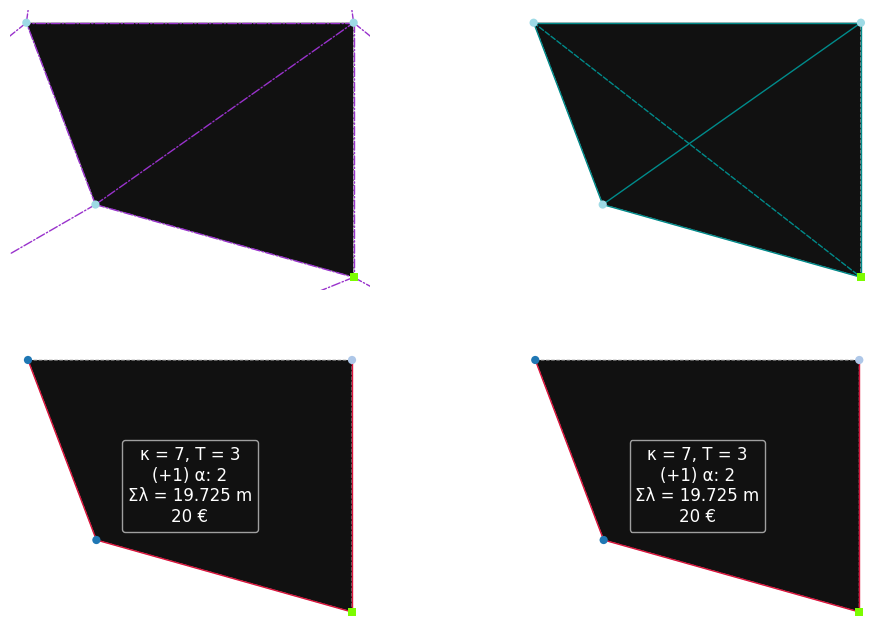

In [26]:
# only obstacles
wfn_new_obstacles = WindFarmNetwork(turbinesC=turbines, substationsC=substations, obstaclesC=obstacles, cables=7)
res_optimize = wfn_new_obstacles.optimize()
fig, axs = plt.subplots(2, 2, facecolor='none', figsize=(12, 8))
ax1, ax2, ax3, ax4 = axs.flatten()
wfn_new_obstacles.plot_navigation_mesh(ax=ax1)
wfn_new_obstacles.plot_available_links(ax=ax2)
wfn_new_obstacles.plot_selected_links(ax=ax3)
wfn_new_obstacles.plot(ax=ax4)

<Axes: >

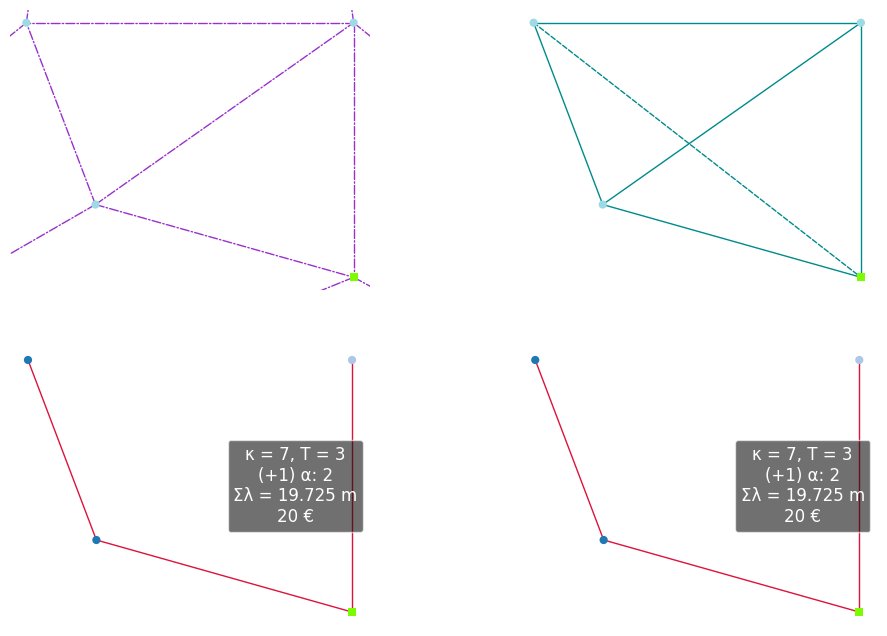

In [28]:
# No border, no obstacles
wfn_new = WindFarmNetwork(turbinesC=turbines, substationsC=substations, cables=7)
res_optimize = wfn_new.optimize()
fig, axs = plt.subplots(2, 2, facecolor='none', figsize=(12, 8))
ax1, ax2, ax3, ax4 = axs.flatten()
wfn_new.plot_navigation_mesh(ax=ax1)
wfn_new.plot_available_links(ax=ax2)
wfn_new.plot_selected_links(ax=ax3)
wfn_new.plot(ax=ax4)

In [30]:
wfn_new.G.graph

{'T': 3,
 'R': 1,
 'B': 0,
 'VertexC': array([[ 2.9,  4. ],
        [10. ,  9. ],
        [ 1. ,  9. ],
        [10. ,  2. ]]),
 'border': None,
 'name': '',
 'handle': '',
 'planar': <networkx.algorithms.planarity.PlanarEmbedding at 0x18d8cd9be00>,
 'diagonals': bidict({(-1, 2): (0, 1)}),
 'd2roots': array([[ 7.37631344],
        [ 7.        ],
        [11.40175425],
        [38.51093651],
        [30.36293413],
        [39.75550276]]),
 'corner_to_A_edges': defaultdict(list, {}),
 'hull': [2, 0, -1, 1],
 'hull_prunned': [2, 0, -1, 1],
 'hull_concave': [2, 0, -1, 1],
 'norm_offset': array([1., 2.]),
 'norm_scale': 0.1453248918170118,
 'inter_terminal_clearance_min': 5.348831648126533,
 'inter_terminal_clearance_safe': 6.015843945730385,
 'capacity': 7,
 'has_loads': True,
 'max_load': 2,
 'creator': 'EW_presolver',
 'solver_details': {'log': [(1, 'remE', (-1, 2)), (1, 'addE', (2, 0))],
  'iterations': 2,
  'prevented_crossings': 0},
 'num_diagonals': 0,
 'cables': array([(7, 1.)], dty